In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [70]:
ruta_txt = "C:\\Users\\fraja\\Desktop\\prueba.txt"
train_values = []
labels_values = []

with open(ruta_txt, 'r') as f:
    next(f)  # Saltar la primera línea que contiene el encabezado
    for line in f:
        w, x, y, z, etiqueta = map(float, line.strip().split(','))
        dato = [w, x, y, z]
        train_values.append(dato)
        labels_values.append(etiqueta)
    

labels_one_hot = to_categorical(labels_values)

print("train_values")
print(train_values)
print("labels_values")
print(labels_one_hot)

train_values
[[0.901891, 0.10485, 0.20056, 0.12354], [0.091891, 0.00485, 0.07156, 0.00543]]
labels_values
[[1. 0.]
 [0. 1.]]


In [71]:
# Convertimos los datos en tensores
inputs = tf.convert_to_tensor(train_values, dtype=tf.float32)
labels = tf.convert_to_tensor(labels_one_hot, dtype=tf.float32)

# Creamos el modelo
model = Sequential([
    Dense(2, input_shape=(4,), activation='softmax')
])

# Compilamos el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history = model.fit(inputs, labels, epochs=10, batch_size=8, verbose=2)

# Evaluamos el modelo
loss, accuracy = model.evaluate(inputs, labels_one_hot)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/10
1/1 - 1s - loss: 0.7993 - accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/10
1/1 - 0s - loss: 0.7985 - accuracy: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 3/10
1/1 - 0s - loss: 0.7978 - accuracy: 0.0000e+00 - 8ms/epoch - 8ms/step
Epoch 4/10
1/1 - 0s - loss: 0.7970 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 5/10
1/1 - 0s - loss: 0.7963 - accuracy: 0.0000e+00 - 9ms/epoch - 9ms/step
Epoch 6/10
1/1 - 0s - loss: 0.7956 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 7/10
1/1 - 0s - loss: 0.7949 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 8/10
1/1 - 0s - loss: 0.7941 - accuracy: 0.0000e+00 - 8ms/epoch - 8ms/step
Epoch 9/10
1/1 - 0s - loss: 0.7934 - accuracy: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 10/10
1/1 - 0s - loss: 0.7927 - accuracy: 0.0000e+00 - 9ms/epoch - 9ms/step
1/1 [==============================] - 0s 199ms/step - loss: 0.7920 - accuracy: 0.0000e+00
Loss: 0.7919840812683105, Accuracy: 0.0


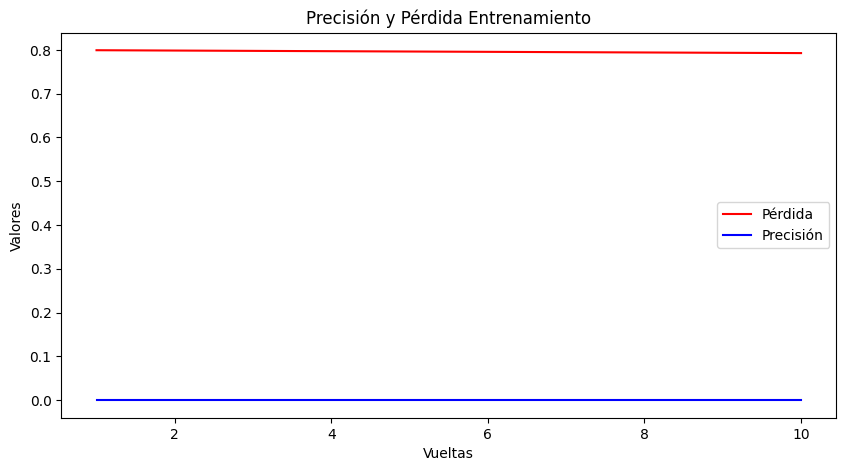

In [72]:
# Obtener la pérdida y la precisión del historial de entrenamiento
loss = history.history['loss']
accuracy = history.history['accuracy']

# Crear el gráfico
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 5))

# Gráfico de pérdida
plt.plot(epochs, loss, 'r', label='Pérdida')
plt.plot(epochs, accuracy, 'b', label='Precisión')

plt.title('Precisión y Pérdida Entrenamiento')
plt.xlabel('Vueltas')
plt.ylabel('Valores')
plt.legend()

plt.show()